Check Python version

In [583]:
!python --version

Python 3.10.14


Import libraries

In [584]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [585]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [586]:
train_df = pd.read_csv(file_name)

In [587]:
train_df.shape

(144, 2)

In [588]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [589]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [590]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [591]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [592]:
train_df[target_col] = train_df[target_col].astype(float)

In [593]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

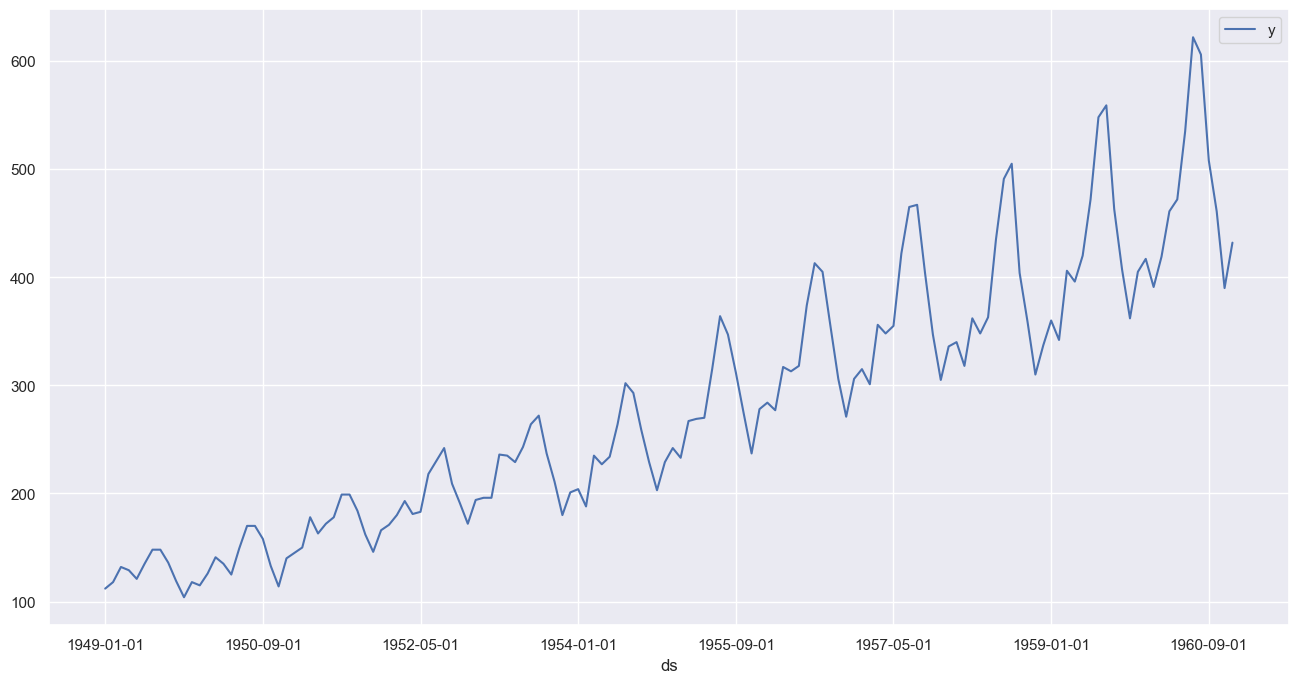

In [594]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [595]:
train_data = []

In [596]:
for value in train_df.values:
    train_data.append(list(value))

In [597]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [598]:
# Default model request
model_request = {
    'type': 'meta_wa',
    'scorers': ['smape', 'mase'],
    'params': {
        'preprocessors': [
            {'type': 'dartsimputer'},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_naive'},
            {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_autotheta'},
            # {'type': 'darts_autoarima'},
            # {'type': 'darts_autoets'},
        ],
    },
}

# # Onboard NeuralProphet customized model request
# np_external_model_request = {
#     'params': {
#       'changepoints_range': 0.2,
#       'epochs': 2,
#       'growth': 'off'
#     },
#     'metrics': [],
#     'type': 'neuralprophet',
# }
# # np_external_model_request = None

user_value = 0.9
output_type = 'estimate'  # 'data', 'estimate'
mauq_external_params = {
    'problem_type': 'regression',
    'confidence_level': user_value,
    'output_type': output_type

}

deepsybil_external_model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            # {'type': 'dartsimputer'},
            # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            # {'type': 'darts_tcn',
            #  'params': {
            #      'output_chunk_length': 52,
            #      'input_chunk_length': 104,                 
            #      'n_epochs': 20,
            # }},
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            {'type': 'darts_nlinear'},
            {'type': 'darts_dlinear'},
            # {'type': 'darts_blockrnn'},
            # {'type': 'darts_tsmixer',
            #  'params': {
            #      'output_chunk_length': 52,
            #      'input_chunk_length': 104,                 
            #      'n_epochs': 20,
            # }},
            #  {'type': 'darts_tide'}
        ],
    },
}


# # Customized model request
model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            {'type': 'dartsimputer'},
            {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            {'type': 'darts_naive'},
            # {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_autotheta'},
            # {'type': 'stats_autotheta'},
            # {'type': 'darts_autoets'},
            # {'type': 'stats_autoets'},
            # {'type': 'darts_autoarima'},
            # {'type': 'stats_autoarima'},
            # {'type': 'darts_autoces'},
            # {'type': 'darts_kalman'},
            # {'type': 'darts_catboost'},            
            # # {'type': 'darts_tbats'},
            # # {'type': 'darts_linearregression'},
            # {'type': 'darts_lightgbm',
            #  'params': {
            #      'lags': 12,
            #      'output_chunk_length': 6,
            #      'verbose': -1
            # }}
            # {'type': 'neuralprophet',
            #  'external_params': np_external_model_request
            # }  # Onboard NeuralProphet external service
            # {'type': 'deepsybil',
            #  'external_params': deepsybil_external_model_request
            # }  # Onboard NeuralProphet external service
        ],
        
    },
    'mauq_params':mauq_external_params,
}

This is for JSON model_request

In [599]:
# file_path = 'model_request.json'
# # For writing the model request to a json file
# with open(file_path, 'r') as file:
#     model_request = json.load(file)

This is for YAML model_request

In [600]:
# file_path = 'model_request.yaml'
# # For reading the model request from a yaml file
# with open(file_path, 'r') as file:
#     model_request = yaml.safe_load(file)

Train API JSON Payload

In [601]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

In [602]:
api_json['model']

{'type': 'meta_wa',
 'scorers': ['mase', 'smape'],
 'params': {'preprocessors': [{'type': 'dartsimputer'},
   {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
   {'type': 'minmaxscaler'}],
  'base_models': [{'type': 'darts_naive'}]},
 'mauq_params': {'problem_type': 'regression',
  'confidence_level': 0.9,
  'output_type': 'estimate'}}

Build URL

In [603]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [604]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [605]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [606]:
# %%time
# print("Hello")
response = requests.post(url, json=api_json)
# print(response)
# print()

In [607]:
train_json_out = response.json()  # dict output
train_json_out
# response.json()


{'model': 'AgEBCE0iAABIIgAAFiEAABgAAAANIQAASQQAAIAAZWxpk4xvlGxvjG2UBGFplHNyYZQojC50bZRNk3BveJRJjC5kbUlljBVvaQx0jIx5QygklIkDSv9DbpRkLi5ld22TdGQoZHOUX2V5k2FhYZRplE4CUk7/KEt0AJRoiGj/AJSUgMbEAwFqaNHOzDUynJmX19Q9O6ShnwgGb2xqqqcQDnd1ctvZQj89Eg94dt/c2kNBqqel5eJLSbKwrRYUfXp4uLUeHIWDgOnnUE5Li4ny71hWU726IyEe8/BZV8C+uyQii4iGxsQtKpORjvf1XlxZmZcA/WZkYsvIMS8sbGrT0To3NZ6bBAIA1NI7OKGfnQYDbH1xNXVSlHJtlHJmjF90c2hscpR0ZWyUc2VTlBRnTZNoIJRLiYxllEtSlIkD/0t0aCMoSzN1jJRlbH11bZSUS4l1BmhobGiUlCgAlGholGhcaIUoVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHSMLnNmTWmGYQUKaIZoaHVNYYFpYWlzlABSlACGBRRtcE1slHNzRHCBIm9yZ25pZ5QoaWV0ZVRlfW1fFWNhCWFObyhyLmV4ZX1tBRRjZVBkYSkFOmiUeZRyZZSDlAABKQ2MkyMoS0+UTkqUlIMBMShLYgAAjJRlaGFpjEkpBTpoDWhoAUJrA+iAiCAnwFlg+ACYMRWutU5V7oaNJi3GXkPc43uDG7S7VFvzjAKbojpC2nN6ExqySzDIz2hvCKCoQEjgeV32/ZadNs7VbnUOposjK8PLY/wDnKM71Eri6oKKIrvCWmL6k3gQF7C3UOjwi

In [608]:
estimate=train_json_out['estimate']

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [609]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [610]:
model = train_json_out['model']

Forecast API JSON Payload

In [611]:
api_json = {
    'model': model,
    'data': dates,
    'estimate' : estimate
}

Build URL (same as train except for the endpoint)

In [612]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [613]:
%%time
response = requests.post(url, json=api_json,verify=False)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 4.05 s


In [614]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1961-01-01', 432.0, 305.8, 558.2],
  ['1961-02-01', 432.0, 305.8, 558.2],
  ['1961-03-01', 432.0, 305.8, 558.2],
  ['1961-04-01', 432.0, 305.8, 558.2],
  ['1961-05-01', 432.0, 305.8, 558.2],
  ['1961-06-01', 432.0, 305.8, 558.2],
  ['1961-07-01', 432.0, 305.8, 558.2],
  ['1961-08-01', 432.0, 305.8, 558.2],
  ['1961-09-01', 432.0, 305.8, 558.2],
  ['1961-10-01', 432.0, 305.8, 558.2],
  ['1961-11-01', 432.0, 305.8, 558.2],
  ['1961-12-01', 432.0, 305.8, 558.2],
  ['1962-01-01', 432.0, 305.8, 558.2],
  ['1962-02-01', 432.0, 305.8, 558.2],
  ['1962-03-01', 432.0, 305.8, 558.2],
  ['1962-04-01', 432.0, 305.8, 558.2],
  ['1962-05-01', 432.0, 305.8, 558.2],
  ['1962-06-01', 432.0, 305.8, 558.2],
  ['1962-07-01', 432.0, 305.8, 558.2],
  ['1962-08-01', 432.0, 305.8, 558.2],
  ['1962-09-01', 432.0, 305.8, 558.2],
  ['1962-10-01', 432.0, 305.8, 558.2],
  ['1962-11-01', 432.0, 305.8, 558.2],
  ['1962-12-01', 432.0, 305.8, 558.2]]}

Combine forecast dates and output

In [615]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col,"lower_interval","upper_interval"],
)

In [616]:
forecast_df.shape

(24, 4)

In [617]:
forecast_df.columns

Index(['ds', 'y', 'lower_interval', 'upper_interval'], dtype='object')

In [618]:
forecast_df.head()

,ds,y,lower_interval,upper_interval
0,1961-01-01,432.0,305.8,558.2
1,1961-02-01,432.0,305.8,558.2
2,1961-03-01,432.0,305.8,558.2
3,1961-04-01,432.0,305.8,558.2
4,1961-05-01,432.0,305.8,558.2


In [619]:
forecast_df.tail()

,ds,y,lower_interval,upper_interval
19,1962-08-01,432.0,305.8,558.2
20,1962-09-01,432.0,305.8,558.2
21,1962-10-01,432.0,305.8,558.2
22,1962-11-01,432.0,305.8,558.2
23,1962-12-01,432.0,305.8,558.2


Plot train and forecast side-by-side

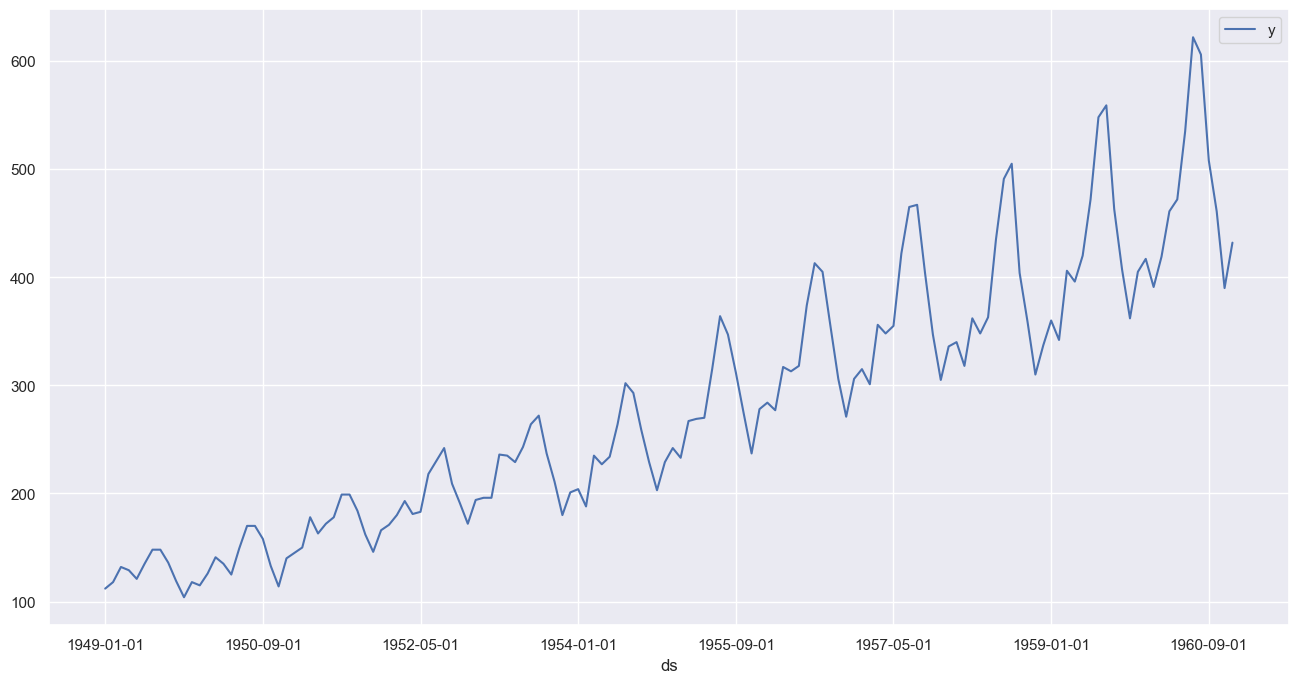

In [620]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

Combine train and forecast sets

In [621]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [622]:
df.shape

(168, 5)

In [623]:
df.head()

,ds,y,color,lower_interval,upper_interval
0,1949-01-01,112.0,b,NaN,NaN
1,1949-02-01,118.0,b,NaN,NaN
2,1949-03-01,132.0,b,NaN,NaN
3,1949-04-01,129.0,b,NaN,NaN
4,1949-05-01,121.0,b,NaN,NaN


In [624]:
df.tail()

,ds,y,color,lower_interval,upper_interval
163,1962-08-01,432.0,NaN,305.8,558.2
164,1962-09-01,432.0,NaN,305.8,558.2
165,1962-10-01,432.0,NaN,305.8,558.2
166,1962-11-01,432.0,NaN,305.8,558.2
167,1962-12-01,432.0,NaN,305.8,558.2


Plot combined train and forecast sets with the vertical black line as the cut-off

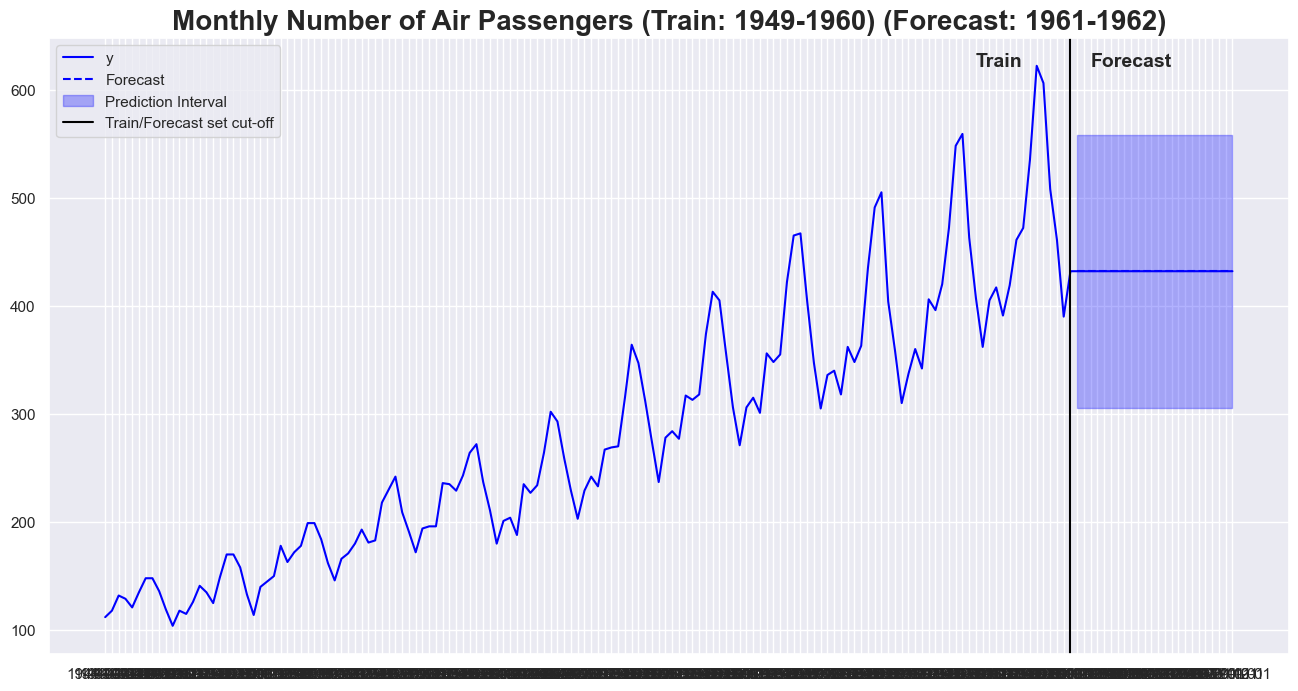

In [625]:
plt.figure(figsize=figsize)

plt.plot(df[time_col], df[target_col], color='blue', label='y')

plt.plot(forecast_df[time_col], forecast_df[target_col], color='blue', linestyle='dashed', label='Forecast')

plt.fill_between(forecast_df[time_col], forecast_df['lower_interval'], forecast_df['upper_interval'], 
                 color='blue', alpha=0.3, label='Prediction Interval')

plt.axvline(x=df[time_col].iloc[len(train_df)-1], color='black', label='Train/Forecast set cut-off')

plt.text(df[time_col].iloc[len(train_df)-15], df[target_col].max(), 'Train', fontweight='bold', fontsize=14)
plt.text(df[time_col].iloc[len(train_df)+2], df[target_col].max(), 'Forecast', fontweight='bold', fontsize=14)

plt.title('Monthly Number of Air Passengers (Train: 1949-1960) (Forecast: 1961-1962)', fontweight='bold', fontsize=20)
plt.legend()
plt.show()

